In [1]:
# se realizan las importaciones necesarios
import numpy as np
from numpy.random import normal
from numpy.random import uniform
from numpy.random import triangular
import matplotlib.pyplot as plt
from scipy import stats
print("Todas las librerías han sido importadas.")

Todas las librerías han sido importadas.


In [2]:
N=10**4

# Ajuste de curvas con Monte Carlo

El método de ajuste de curvas con Monte Carlo propone generar los datos que conforman una curva de calibración, de forma que se obtengan los datos del eje de las abscisas que siguen una distribución determnada, así como los del eje de las ordenadas.

In [3]:
x=np.array([0,30,60,100,150,200])
Y=np.array([0.00e-3,0.10e-3,0.40e-3,1.20e-3,3.00e-3,6.50e-3]).reshape((len(x),1))
u=np.array([0.14e-3,0.17e-3,0.17e-3,0.17e-3,0.22e-3,0.23e-3]).reshape((len(x),1))

In [4]:
Y=Y+normal(0,u,size=(len(x),N))
Y=Y.flatten('C').reshape(len(x)*N,1)

In [5]:
x=x.reshape((len(x),1))+uniform(-1,1,size=(len(x),N))
x=x.flatten('C')
x=x.reshape((len(x),1))

In [6]:
X=np.hstack((np.ones((len(x),1)),x,x**2))

In [7]:
cov=np.linalg.inv(np.matmul(X.T,X))
b=np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)
y_pred=np.matmul(X,b)
e=Y-y_pred
var=e**2/(len(Y)-1)

In [8]:
w=var+((np.repeat(u, N, axis = None)**2).reshape(len(x),1))

In [9]:
var.shape

(60000, 1)

In [10]:
W=np.zeros((len(x),len(x)))
for i in range(len(W)):
    W[i,i]=1/w[i]

In [11]:
cov_WLS=np.linalg.inv(np.matmul(np.matmul(X.T,W),X))
b_WLS=np.matmul(np.matmul(np.matmul(cov_WLS,X.T),W),Y)
y_pred=np.matmul(X,b_WLS)
e=Y-y_pred
var=e**2/(len(Y)-1)

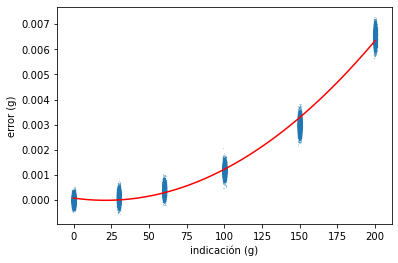

In [12]:
plt.scatter(X[:,1],Y,marker=".",s=0.05)
plt.plot(np.arange(0,200+0.2,0.2),b_WLS[0]+b_WLS[1]*np.arange(0,200+0.2,0.2)+b_WLS[2]*np.arange(0,200+0.2,0.2)**2,color="red")
plt.xlabel("indicación (g)")
plt.ylabel("error (g)")
plt.show()

In [13]:
b_WLS

array([[ 7.46794535e-05],
       [-8.39378625e-06],
       [ 1.98537077e-07]])